### Practice on Saving Models
- Load MNIST dataset.
- Reshape it.
- Create data augmentation with random rotations, random shifts, and random 
- Normalize the inputs.
- Implement one hot encodingon the target variable
- Define a baseline model
- Save your model.
- Load your model and test it on your test dataset
- Create checkpoints to save the network weights only when there is an improvement in classification accuracy on the validation dataset




In [0]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import matplotlib.pyplot as pyplot
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
import os
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [0]:
# load (downloaded if needed) the fashiom_mnist dataset 
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [0]:
X_train.shape

(60000, 28, 28)

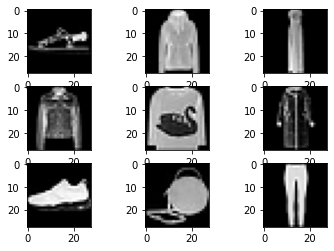

In [0]:
# load (downloaded if needed) the fashiom_mnist dataset 
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
# Standardize images across the dataset, mean=0, stdev=1
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# define data preparation
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True) # fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
     # create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
  # show the plot
    pyplot.show()
    break

                        

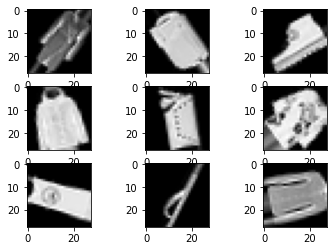

In [0]:
# Random Rotations
# load (downloaded if needed) the fashiom_mnist dataset 
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# define data preparation
datagen = ImageDataGenerator(rotation_range=90)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
     # create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
  # show the plot
    pyplot.show()
    break

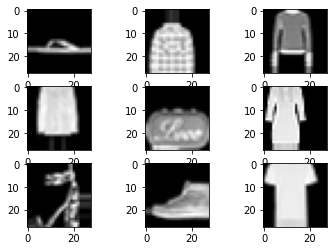

In [0]:
# Random Shifts
# load (downloaded if needed) the fashiom_mnist dataset 
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# define data preparation
shift = 0.2
datagen = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
     # create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
  # show the plot
    pyplot.show()
    break

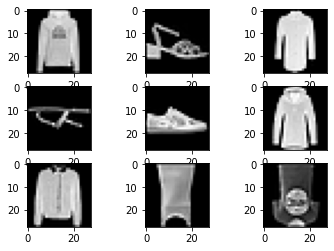

In [0]:
# Random Flips
# load (downloaded if needed) the fashiom_mnist dataset 
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# define data preparation
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images   
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
     # create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
  # show the plot
    pyplot.show()
    break

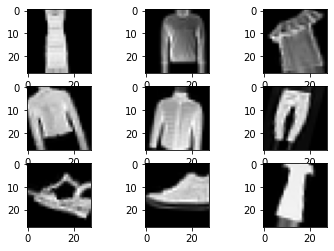

In [0]:
# load (downloaded if needed) the fashiom_mnist dataset 
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
#normalize
mean = np.mean(X_train)
stddev = np.std(X_train)

X_train = (X_train - mean) / stddev
X_test = (X_test - mean) / stddev


# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# define data preparation
datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

# fit parameters from data
datagen.fit(X_train)

# configure batch size and retrieve one batch of images   
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, save_to_dir='/usr/images',
save_prefix='aug', save_format='png'):
     # create a grid of 3x3 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
  # show the plot
    plt.show()
    break


In [0]:
# define a simple CNN model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D())
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
    # save model and architecture to single file
    model.save("model.h5")
    print("Saved model to disk")

In [0]:
#invoke baseline model to be saved
baseline_model()
#load baseline model
model = load_model('model.h5') # summarize model. model.summary()

# checkpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1,
save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=10, callbacks=callbacks_list,
    verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Baseline Error: %.2f%%" % (100-scores[1]*100))

Saved model to disk
Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 65s - loss: 0.0673 - accuracy: 0.9732 - val_loss: 0.0621 - val_accuracy: 0.9744

Epoch 00001: val_accuracy improved from -inf to 0.97439, saving model to weights.best.hdf5
Epoch 2/100
 - 66s - loss: 0.0500 - accuracy: 0.9801 - val_loss: 0.0540 - val_accuracy: 0.9784

Epoch 00002: val_accuracy improved from 0.97439 to 0.97840, saving model to weights.best.hdf5
Epoch 3/100
 - 66s - loss: 0.0432 - accuracy: 0.9828 - val_loss: 0.0487 - val_accuracy: 0.9811

Epoch 00003: val_accuracy improved from 0.97840 to 0.98107, saving model to weights.best.hdf5
Epoch 4/100
 - 66s - loss: 0.0381 - accuracy: 0.9849 - val_loss: 0.0495 - val_accuracy: 0.9810

Epoch 00004: val_accuracy did not improve from 0.98107
Epoch 5/100
 - 65s - loss: 0.0342 - accuracy: 0.9865 - val_loss: 0.0519 - val_accuracy: 0.9803

Epoch 00005: val_accuracy did not improve from 0.98107
Epoch 6/100
 - 64s - loss: 0.0311 - accuracy: 0.9878 - val_lo

In [0]:
# How to load and use weights from a checkpoint
#load baseline model
model = load_model('model.h5') 
# summarize model. 
model.summary()

# load weights
model.load_weights("weights.best.hdf5")

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Loaded model Error: %.2f%%" % (100-scores[1]*100))


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 592,074
Trainable params: 592,074
Non-trainable params: 0
________________________________________________

In [0]:
#End to end model with augmentation 
# load (downloaded if needed) the fashiom_mnist dataset 
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
y_tst = y_test
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

X_t, X_val, y_t, y_val = train_test_split(X_train, y_train)




4423680/4422102 [==============================] - 2s 0us/step


In [0]:
epochs=100
batch_size=32
IMAGE_WIDTH=28
IMAGE_HEIGHT=28
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)
	
validation_datagen = ImageDataGenerator(rescale=1./255)



In [0]:
# define a simple CNN model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D())
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
    # save model and architecture to single file
    model.save("model.h5")
    print("Saved model to disk")

In [0]:
baseline_model()
#load baseline model
model = load_model('model.h5') # summarize model. model.summary()

# checkpoint
filepath="weights_aug.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1,
save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# Put data in generator
train_generator= train_datagen.flow(X_t, 
                            y_t, 
                            batch_size=32,
                            seed=42)

validation_generator = validation_datagen.flow (X_val, 
                            y_val, 
                            batch_size=32,
                            seed=42)
history = model.fit_generator(
                train_generator,
                steps_per_epoch=X_t.shape[0]/32,
                epochs=100,
                verbose=2,
                callbacks=callbacks_list,
                validation_data=validation_generator,
                shuffle=True
    )


Saved model to disk
Epoch 1/100
 - 29s - loss: 0.7642 - accuracy: 0.7137 - val_loss: 0.3638 - val_accuracy: 0.8275

Epoch 00001: val_accuracy improved from -inf to 0.82747, saving model to weights_aug.best.hdf5
Epoch 2/100
 - 23s - loss: 0.5867 - accuracy: 0.7770 - val_loss: 0.3361 - val_accuracy: 0.8268

Epoch 00002: val_accuracy did not improve from 0.82747
Epoch 3/100
 - 23s - loss: 0.5383 - accuracy: 0.7944 - val_loss: 0.6228 - val_accuracy: 0.8461

Epoch 00003: val_accuracy improved from 0.82747 to 0.84613, saving model to weights_aug.best.hdf5
Epoch 4/100
 - 23s - loss: 0.5115 - accuracy: 0.8052 - val_loss: 0.2581 - val_accuracy: 0.8493

Epoch 00004: val_accuracy improved from 0.84613 to 0.84933, saving model to weights_aug.best.hdf5
Epoch 5/100
 - 23s - loss: 0.4929 - accuracy: 0.8115 - val_loss: 0.5591 - val_accuracy: 0.8607

Epoch 00005: val_accuracy improved from 0.84933 to 0.86073, saving model to weights_aug.best.hdf5
Epoch 6/100
 - 23s - loss: 0.4749 - accuracy: 0.8180 - v

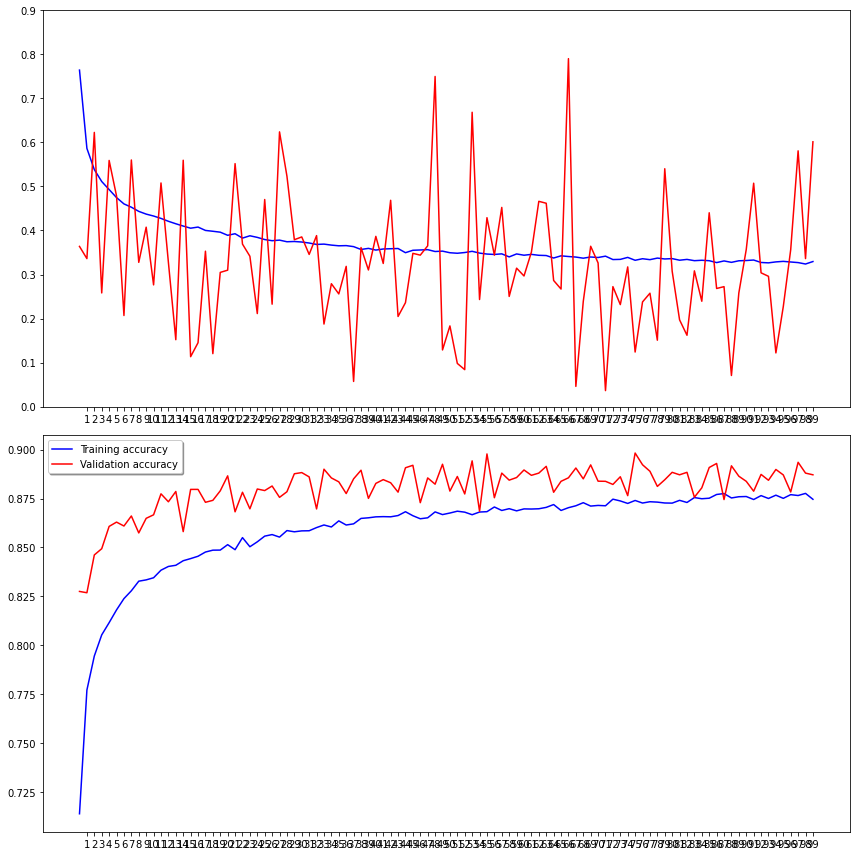

In [0]:

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [0]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow (X_test, 
                            y_test, 
                            batch_size=32,
                            seed=42)

predict = model.predict_generator(test_generator, steps=X_test.shape[0]/32)

In [0]:
np.argmax(predict[0], axis=-1)

6

In [0]:
np.argmax(predict[1], axis=-1)

3

In [0]:
y_tst[1]

2

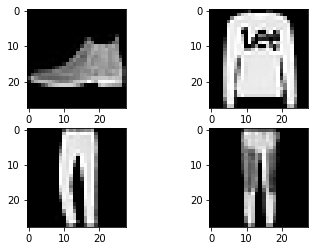

In [0]:
X_test = X_test.reshape((X_test.shape[0], 28, 28))
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_test[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_test[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_test[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_test[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [0]:
pred_df = pd.DataFrame({
})
pred_df['category'] = np.argmax(predict, axis=-1)

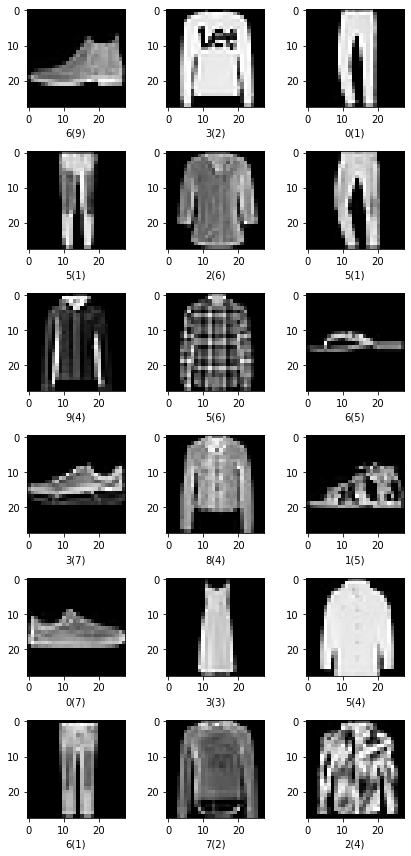

In [0]:
sample_test = pred_df.head(18)
sample_test.head()
plt.figure(figsize=(6, 12))
for index, row in sample_test.iterrows():
    predicted = str(row['category'])
    img = X_test[index]
    plt.subplot(6,3, index+1)
    plt.imshow(img, cmap=plt.get_cmap('gray'))
    actual = str(y_tst[index])
    plt.xlabel(predicted + '(' + "{}".format(actual) + ')' )
plt.tight_layout()
plt.show()